##O que é PageRank?

O PageRank foi desenvolvido por volta de 1995 na Universidade de Stanford por Larry Page, daí vem o nome “Page” Rank.Foi o primeiro algoritmo utilizado pelo Google para classificar páginas da internet.Tem como objetivo avaliar a relevância de uma determinada página.A idéia por trás do PageRank se baseia em uma rede citações podendo ser representada por um grafo, onde cada nó representa uma página Web e a ligação entre as páginas se dá por meio de uma referência que uma página faz a outra. 

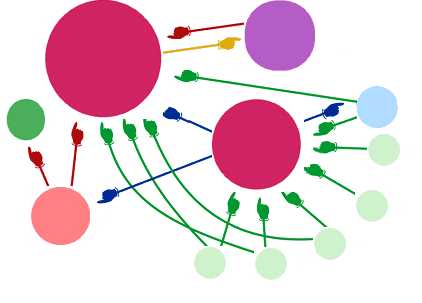

Uma característica interessante nesse algoritmo é o valor de PageRank de um determinado Website não se dá apenas pelo número de citações mas sim pela relevância que eles possuem. 




##PageRank em termos de álgebra linear:
<br>
PageRank cria um vetor de ranks: um elemento para cada página. Também cria uma matriz de links: cada link de uma página para a outra coloca um '1' na célula apropriada na matriz.
<br><br>
Então ele pega este vetor -- inicialmente definido para algum valor padrão -- e repetidamente aplica a matriz de links a ele.

##O Poder dos Autovetores

Uma aplicação dos autovetores é a diagonalização de uma matriz. Dados os autovalores e autovetores de uma matriz, você pode criar três matrizes que quando combinadas, correspondem à matriz original. A matriz do meio lida com o escalonamento e é uma matriz diagonal, tendo os autovalores da matriz original como entradas.

Isso nos permite algo incrível: exponenciar a matriz original é equivalente a exponenciar *apenas* a matriz do meio do trio de matrizes vindas da diagonalização. E por fim, exponenciar uma matriz diagonal é equivalente à exponenciar *apenas* as entradas da diagonal principal.

##Aplicando ao PageRank
<br>
No PageRank aplicamos várias vezes a matriz de links ao vetor PageRank. Isso equivale à repetidamente multiplicar a matriz de links por si mesma e depois de suficientes auto-multiplicações, aplicar o resultado ao vetor PageRank.
<br><br>Mas, multiplicação repetida de algo por si mesmo é a exponenciação. Então, nós podemos fazer isso exponenciando a matriz, o que pode ser feito através da exponenciação da diagonal da matriz centraldo resultado da decomposição, a qual contém os autovalores da matriz original.
<br><br>
Porém, o PageRank trabalha com uma matriz de milhões de valores, ou seja, até que o algoritmo se estabilize, existe um número imenso de iterações, ou seja de exponenciações da matriz de links. Assim, o maior autovalor passa a ser dominante na matriz, assim como a matriz de links final tem como vetor dominante um vetor associado com o maior autovalor, da mesma forma que o autovetor final.